In [ ]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
import zipfile
import shutil

In [ ]:
def get_rgb_intensities(video_path):
    red = []
    green = []
    blue = []
    video_capture = cv2.VideoCapture(video_path)

    if not video_capture.isOpened():
        print("Error: Unable to open video file")
        return

    while True:
        ret, frame = video_capture.read()

        if not ret:
            break

        blue_channel, green_channel, red_channel = cv2.split(frame)
        
        blue_intensity = np.mean(blue_channel)
        green_intensity = np.mean(green_channel)
        red_intensity = np.mean(red_channel)
        # non_zero_elements = blue_channel[blue_channel != 0]
        # unique_elements = np.unique(non_zero_elements)
        # print("Non-zero elements:", unique_elements)
        
        blue.append(blue_intensity)
        green.append(green_intensity)
        red.append(red_intensity)

        # print("RGB Intensities (Blue, Green, Red):", blue_intensity, green_intensity, red_intensity)

    frame_rate = video_capture.get(cv2.CAP_PROP_FPS)

    video_capture.release()
    return blue, green, red, frame_rate

In [ ]:
intensities = [] # list of dataframes, containing rgb intensities of each video

def process_videos_in_folder(folder_path):
    if folder_path.endswith('.zip'):
        with zipfile.ZipFile(folder_path, 'r') as zip_ref:
            zip_ref.extractall('temp_extracted_folder')
        
        folder_path = os.path.join('temp_extracted_folder', os.path.basename(os.path.splitext(folder_path)[0]))
    
    files = os.listdir(folder_path)
    
    for file_name in files:
        if file_name.endswith('.mp4'):
            print(file_name)
            
            video_path = os.path.join(folder_path, file_name)
            
            blue, green, red, frame_rate = get_rgb_intensities(video_path)

            columns = ['red', 'green', 'blue', 'frame_rate']
            video = pd.DataFrame(columns=columns)
            
            video['red'] = red
            video['green'] = green
            video['blue'] = blue
            video['frame_rate'] = frame_rate

            intensities.append(video)

    if os.path.exists('temp_extracted_folder'):
        shutil.rmtree('temp_extracted_folder')

folder_path = "cropped_videos"
process_videos_in_folder(folder_path)

cropped_Sample-01.mp4
cropped_Sample-03.mp4
cropped_Sample-05.mp4
cropped_Sample-07.mp4
cropped_Sample-11.mp4
cropped_Sample-13.mp4
cropped_Sample-15.mp4
cropped_Sample-17.mp4
cropped_Sample-19.mp4
cropped_Sample-21.mp4
cropped_Sample-23.mp4
cropped_Sample-25.mp4
cropped_Sample-29.mp4
cropped_Sample-31.mp4
cropped_Sample-35.mp4
cropped_Sample-37.mp4
cropped_Sample-39.mp4
cropped_Sample-43.mp4
cropped_Sample-45.mp4
cropped_Sample-49.mp4


In [6]:
display(intensities[1])

,red,green,blue,frame_rate
0,171.94,153.94,150.94,30.015
1,171.94,153.94,150.94,30.015
2,171.29,153.29,150.29,30.015
3,171.29,153.29,150.29,30.015
4,168.37,150.37,147.37,30.015
...,...,...,...,...
2108,183.64,152.64,144.64,30.015
2109,183.64,152.64,144.64,30.015
2110,183.64,152.64,144.64,30.015
2111,183.64,152.64,144.64,30.015


In [7]:
def plot_intensity(red, green, blue):
    red = red.to_list()
    green = green.to_list()
    blue = blue.to_list()
    
    xseq = np.linspace(1, len(red), len(red))

    plt.plot(xseq, red, color='red', label='Red Intensity')
    plt.plot(xseq, green, color='green', label='Green Intensity')
    plt.plot(xseq, blue, color='blue', label='Blue Intensity')
    
    plt.xlabel("Frame")
    plt.ylabel("Intensity")
    plt.legend()
    
    plt.show()

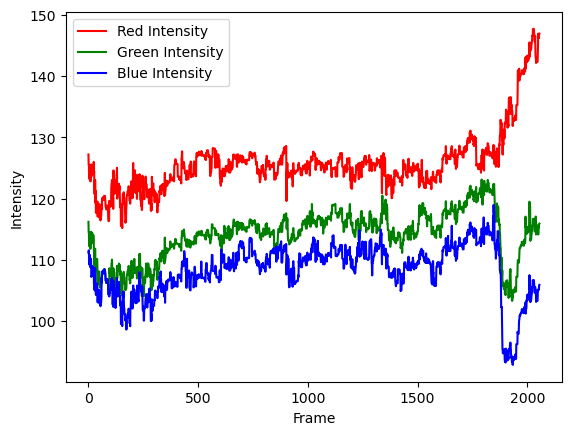

In [8]:
plot_intensity(intensities[4]['red'], intensities[4]['green'], intensities[4]['blue'])

In [9]:
def intensity_rate_change(red):
    red = red.to_list()
    differences = [red[i + 1] - red[i] for i in range(len(red) - 1)]
    time_interval = 1 
    rates_of_change = [difference / time_interval for difference in differences]
    r_point = rates_of_change.index(max(rates_of_change))
    return r_point, rates_of_change

In [10]:
release_point_data = []

for df in intensities:
    r_point, rates_of_change = intensity_rate_change(df['red'])  # Assuming intensity_rate_change is a function
    release_point_data.append({'release_point': r_point, 'rates_of_change': rates_of_change})

release_point_df = pd.DataFrame(release_point_data)
display(release_point_df)

,release_point,rates_of_change
0,1045,"[1.6200000000000045, -1.2399999999999807, -1.5..."
1,697,"[0.0, -0.6500000000000057, 0.0, -2.91999999999..."
2,1897,"[0.3100000000000023, 0.0, 0.7700000000000102, ..."
3,3,"[-0.6200000000000045, 0.03999999999999204, -1...."
4,113,"[-1.6700000000000017, 0.0, -2.2900000000000063..."
5,6,"[-0.960000000000008, 0.6899999999999977, 0.0, ..."
6,11,"[14.86, -0.9399999999999977, 0.0, -20.28999999..."
7,412,"[2.1500000000000057, 0.9099999999999966, -0.35..."
8,1741,"[0.0, 0.0, 6.549999999999983, 4.78000000000000..."
9,92,"[0.8400000000000034, -0.3199999999999932, 0.0,..."


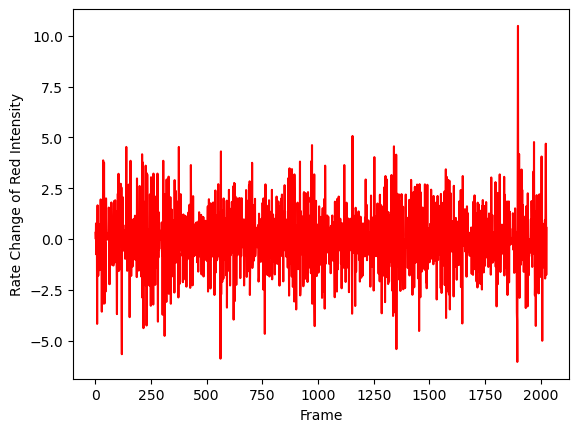

In [11]:
def plot_rates_of_change(release_point_df, row_number):
    xseq = np.linspace(1, len(release_point_df.iloc[row_number]['rates_of_change']), len(release_point_df.iloc[row_number]['rates_of_change']))

    # Plot the graph of rates of change of red intensity for the specified row
    plt.plot(xseq, release_point_df.iloc[row_number]['rates_of_change'], color='red')
    plt.xlabel("Frame")
    plt.ylabel("Rate Change of Red Intensity")
    plt.show()

plot_rates_of_change(release_point_df, 2)

In [12]:
columns = ['redArea', 'greenArea', 'blueArea']
auc = pd.DataFrame(columns=columns)
display(auc)

,redArea,greenArea,blueArea


In [ ]:
def calculate_auc(red, green, blue, release_point, frame_rate=30):
    start_frame = release_point - frame_rate
    end_frame = min(len(red), release_point + frame_rate)
    
    red_area = np.trapz(red[int(start_frame):int(end_frame)])
    green_area = np.trapz(green[int(start_frame):int(end_frame)])
    blue_area = np.trapz(blue[int(start_frame):int(end_frame)])
    
    auc.loc[len(auc)] = {'redArea': red_area, 'greenArea': green_area, 'blueArea': blue_area}

    
    return {'redArea': red_area, 'greenArea': green_area, 'blueArea': blue_area}

In [14]:
for i in range(len(intensities)):
    print(i)
    calculate_auc(intensities[i]['red'], intensities[i]['green'], intensities[i]['blue'], release_point_df['release_point'].iloc[i])

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


In [15]:
display(auc)

,redArea,greenArea,blueArea
0,8661.870,7522.870,7520.870
1,9561.020,8480.020,8260.520
2,8649.245,7733.245,7731.145
3,0.000,0.000,0.000
4,7114.825,6321.325,6197.225
5,0.000,0.000,0.000
6,0.000,0.000,0.000
7,9234.120,7555.720,7861.520
8,8437.160,7346.160,7234.960
9,10133.250,9570.250,9502.250


In [ ]:
labels = pd.read_csv('sample_labels.txt', header=None)
labels.rename(columns={0: 'haemoglobin'}, inplace=True)

display(labels)

,haemoglobin
0,10.5
1,9.6
2,10.8
3,10.8
4,10.8
5,13.3
6,13.1
7,10.5
8,13.2
9,10.8


In [ ]:
auc_combined = auc[['redArea', 'greenArea', 'blueArea']].values

labels_reset_index = labels.reset_index(drop=True)

kf = KFold(n_splits=5, shuffle=True, random_state=42)

mse_scores = []
y_pred_cv_rf = []
y_test_cv_rf = []

for train_index, test_index in kf.split(auc_combined):
    X_train, X_test = auc_combined[train_index], auc_combined[test_index]
    y_train, y_test = labels_reset_index['haemoglobin'].iloc[train_index], labels_reset_index['haemoglobin'].iloc[test_index]
    y_test = y_test.values
    
    rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
    
    rf_regressor.fit(X_train, y_train)
    
    y_pred_fold = rf_regressor.predict(X_test)
    print(y_pred_fold)
    print(y_test)
    y_pred_cv_rf.extend(y_pred_fold)
    y_test_cv_rf.extend(y_test)
    
    mse_fold = mean_squared_error(y_test, y_pred_fold)
    
    mse_scores.append(mse_fold)

avg_mse = np.mean(mse_scores)
print("Average Mean Squared Error (MSE) across 5 folds:", avg_mse)

[11.463 10.926 13.143 10.952]
[10.5  9.6 11.3 10.1]
[13.11607143 13.11607143 11.299      10.541     ]
[10.8 13.3 13.2 11.8]
[10.968     11.914     11.967     12.6500131]
[10.8 13.3 10.1 13.1]
[12.468      10.88       12.235      12.58146786]
[10.8 10.8 11.8 13.7]
[12.68368651 10.589      11.972      10.998     ]
[13.1 10.5 13.3 12.1]
Average Mean Squared Error (MSE) across 5 folds: 1.5215341437184235


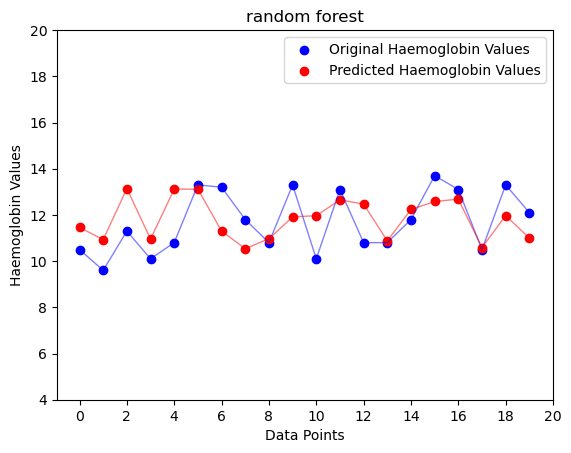

In [ ]:
plt.scatter(range(len(y_test_cv_rf)), y_test_cv_rf, color='blue', label='Original Haemoglobin Values', marker='o')
plt.scatter(range(len(y_pred_cv_rf)), y_pred_cv_rf, color='red', label='Predicted Haemoglobin Values', marker='o')
plt.plot(y_test_cv_rf, color='blue', linestyle='-', linewidth=1, alpha=0.5)
plt.plot(y_pred_cv_rf, color='red', linestyle='-', linewidth=1, alpha=0.5) 
plt.xlabel('Data Points')
plt.ylabel('Haemoglobin Values')
plt.title('random forest')
plt.xticks([0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20])  
plt.yticks([4, 6, 8, 10, 12, 14, 16, 18, 20])
plt.legend()
plt.show()

In [19]:
# accuracy
y_test_cv_rf = np.array(y_test_cv_rf)
y_pred_cv_rf = np.array(y_pred_cv_rf)
a = np.sum((y_test_cv_rf - np.abs(y_pred_cv_rf - y_test_cv_rf))/y_test_cv_rf)
print("acc=", a/20)

acc= 0.909660404452216


In [ ]:
auc_combined = auc[['redArea', 'greenArea', 'blueArea']].values
labels_reset_index = labels.reset_index(drop=True)
kf = KFold(n_splits=5, shuffle=True, random_state=42)
mse_scores = []
y_pred_cv_poly = []
y_test_cv_poly = []

for train_index, test_index in kf.split(auc_combined):
    X_train, X_test = auc_combined[train_index], auc_combined[test_index]
    y_train, y_test = labels_reset_index['haemoglobin'].iloc[train_index], labels_reset_index['haemoglobin'].iloc[test_index]
    y_test = y_test.values
    
    poly = PolynomialFeatures(degree=2)
    
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)
    
    poly_regressor = LinearRegression()
    
    poly_regressor.fit(X_train_poly, y_train)
    
    y_pred_fold = poly_regressor.predict(X_test_poly)
    print(y_pred_fold)
    print(y_test)
    y_pred_cv_poly.extend(y_pred_fold)
    y_test_cv_poly.extend(y_test)
    
    mse_fold = mean_squared_error(y_test, y_pred_fold)
    
    mse_scores.append(mse_fold)

avg_mse = np.mean(mse_scores)
print("Average Mean Squared Error (MSE) across 5 folds:", avg_mse)

[12.03816901 11.11332244 11.74231332 11.07264102]
[10.5  9.6 11.3 10.1]
[13.3042538  13.3042538  10.24014078 10.35727026]
[10.8 13.3 13.2 11.8]
[12.02631661 21.88290755  7.5428953  12.71821015]
[10.8 13.3 10.1 13.1]
[13.05763626  6.1945085  15.0519179  12.57535868]
[10.8 10.8 11.8 13.7]
[12.73697877  8.61804801 10.99973806 15.70119183]
[13.1 10.5 13.3 12.1]
Average Mean Squared Error (MSE) across 5 folds: 8.242330022205318


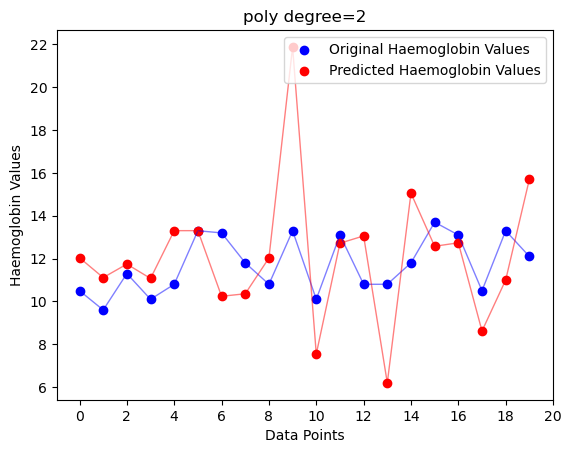

In [ ]:
plt.scatter(range(len(y_test_cv_poly)), y_test_cv_poly, color='blue', label='Original Haemoglobin Values', marker='o')
plt.scatter(range(len(y_pred_cv_poly)), y_pred_cv_poly, color='red', label='Predicted Haemoglobin Values', marker='o')
plt.plot(y_test_cv_poly, color='blue', linestyle='-', linewidth=1, alpha=0.5)  # Connect original values with lines
plt.plot(y_pred_cv_poly, color='red', linestyle='-', linewidth=1, alpha=0.5)   # Connect predicted values with lines
plt.xlabel('Data Points')
plt.ylabel('Haemoglobin Values')
plt.title('poly degree=2')
plt.xticks([0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20])  
# plt.yticks([4, 6, 8, 10, 12, 14, 16, 18, 20])  # Set the y-axis ticks manually
plt.legend()
plt.show()


In [22]:
# accuracy
y_test_cv_poly = np.array(y_test_cv_poly)
y_pred_cv_poly = np.array(y_pred_cv_poly)
acc = np.sum((y_test_cv_poly - np.abs(y_pred_cv_poly - y_test_cv_poly))/y_test_cv_poly)
print("acc=", acc/20)

acc= 0.8134931913791478


In [ ]:
auc_combined = auc[['redArea', 'greenArea', 'blueArea']].values
labels_reset_index = labels.reset_index(drop=True)
kf = KFold(n_splits=5, shuffle=True, random_state=42)
mse_scores = []
y_pred_cv_poly = []
y_test_cv_poly = []

for train_index, test_index in kf.split(auc_combined):
    X_train, X_test = auc_combined[train_index], auc_combined[test_index]
    y_train, y_test = labels_reset_index['haemoglobin'].iloc[train_index], labels_reset_index['haemoglobin'].iloc[test_index]
    y_test = y_test.values
    
    poly = PolynomialFeatures(degree=1)
    
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)
    
    poly_regressor = LinearRegression()
    
    poly_regressor.fit(X_train_poly, y_train)
    
    y_pred_fold = poly_regressor.predict(X_test_poly)
    print(y_pred_fold)
    print(y_test)
    y_pred_cv_poly.extend(y_pred_fold)
    y_test_cv_poly.extend(y_test)
    
    mse_fold = mean_squared_error(y_test, y_pred_fold)
    
    mse_scores.append(mse_fold)

avg_mse = np.mean(mse_scores)
print("Average Mean Squared Error (MSE) across 5 folds:", avg_mse)

[11.57354308 11.28797438 11.59506156 11.03221939]
[10.5  9.6 11.3 10.1]
[13.20252855 13.20252855 10.9987334  10.43224772]
[10.8 13.3 13.2 11.8]
[11.1333495  12.30433047 11.8757541  12.74935575]
[10.8 13.3 10.1 13.1]
[11.27991355 10.03600777 12.23087993 12.53279621]
[10.8 10.8 11.8 13.7]
[12.54310122 12.45992183 11.29778588 11.77532423]
[13.1 10.5 13.3 12.1]
Average Mean Squared Error (MSE) across 5 folds: 1.623113714241729


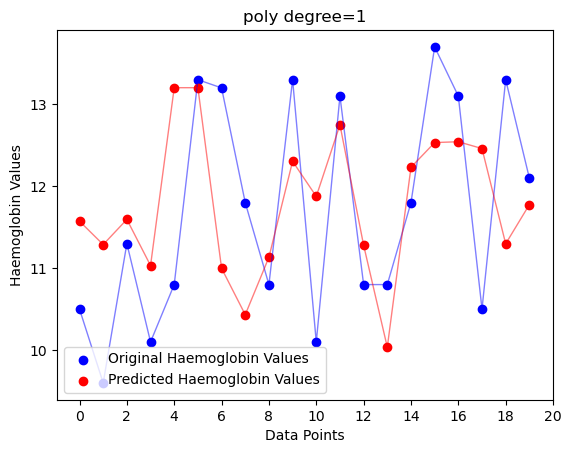

In [ ]:
plt.scatter(range(len(y_test_cv_poly)), y_test_cv_poly, color='blue', label='Original Haemoglobin Values', marker='o')
plt.scatter(range(len(y_pred_cv_poly)), y_pred_cv_poly, color='red', label='Predicted Haemoglobin Values', marker='o')
plt.plot(y_test_cv_poly, color='blue', linestyle='-', linewidth=1, alpha=0.5)
plt.plot(y_pred_cv_poly, color='red', linestyle='-', linewidth=1, alpha=0.5)
plt.xlabel('Data Points')
plt.ylabel('Haemoglobin Values')
plt.title('poly degree=1')
plt.xticks([0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20])  
plt.legend()
plt.show()

In [ ]:
# accuracy
y_test_cv_poly = np.array(y_test_cv_poly)
y_pred_cv_poly = np.array(y_pred_cv_poly)
acc = np.sum((y_test_cv_poly - np.abs(y_pred_cv_poly - y_test_cv_poly))/y_test_cv_poly)
print("acc=", acc/20)

acc= 0.9069655439351584
